In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_excel('anomaly_data.xlsx')
print(data.head())

   temperature   pressure  vibration   humidity   equipment       location  \
0    58.180180  25.029278   0.606516  45.694907     Turbine        Atlanta   
1    75.740712  22.954018   2.338095  41.867407  Compressor        Chicago   
2    71.358594  27.276830   1.389198  58.954409     Turbine  San Francisco   
3    71.616985  32.242921   1.770690  40.565138        Pump        Atlanta   
4    66.506832  45.197471   0.345398  43.253795        Pump       New York   

   faulty  
0       0  
1       0  
2       0  
3       0  
4       0  


In [4]:
features = data[['temperature','pressure','vibration','humidity']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features

array([[-7.86610019e-01, -1.03158239e+00, -1.37992528e+00,
        -3.64983820e-01],
       [ 2.97440159e-01, -1.23149346e+00,  9.96942998e-01,
        -6.88233125e-01],
       [ 2.69224027e-02, -8.15074276e-01, -3.05569027e-01,
         7.54839667e-01],
       ...,
       [ 6.83222323e-02, -9.44187108e-02,  1.33472659e-01,
        -3.68701382e-03],
       [ 2.23248348e+00, -1.15441967e+00, -6.44171969e-01,
        -2.19991898e+00],
       [-2.62080476e+00,  2.97188885e+00,  4.20796900e+00,
         2.50438183e+00]])

In [5]:
### K-Means

Text(0.5, 1.0, 'KMeans cluster')

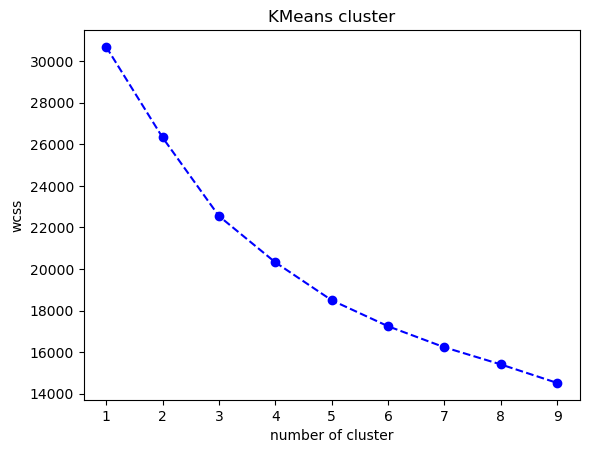

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss =[]
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

#plot elbow method
plt.plot(range(1,10), wcss, marker='o', color='b', linestyle='--')
plt.xlabel('number of cluster')
plt.ylabel('wcss')
plt.title('KMeans cluster')

In [7]:
#running clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

data['clusters'] = clusters

In [8]:
print(data.head())

   temperature   pressure  vibration   humidity   equipment       location  \
0    58.180180  25.029278   0.606516  45.694907     Turbine        Atlanta   
1    75.740712  22.954018   2.338095  41.867407  Compressor        Chicago   
2    71.358594  27.276830   1.389198  58.954409     Turbine  San Francisco   
3    71.616985  32.242921   1.770690  40.565138        Pump        Atlanta   
4    66.506832  45.197471   0.345398  43.253795        Pump       New York   

   faulty  clusters  
0       0         1  
1       0         1  
2       0         2  
3       0         1  
4       0         1  


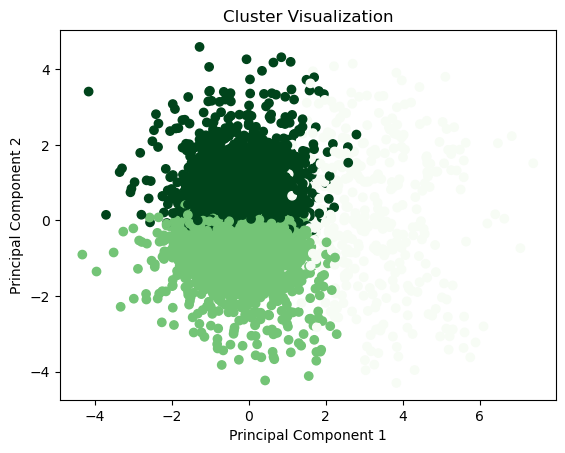

In [9]:
#visulaising results
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

plt.scatter(reduced_features[:,0], reduced_features[:,1], c= data['clusters'], cmap='Greens')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Visualization')
plt.show()

In [10]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# 1. Silhouette Score
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f"Silhouette Score: {silhouette_avg:.4f}")

# 2. Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, clusters)
print(f"Davies-Bouldin Index: {db_index:.4f}")

# 3. Calinski-Harabasz Index
ch_index = calinski_harabasz_score(scaled_features, clusters)
print(f"Calinski-Harabasz Index: {ch_index:.4f}")

Silhouette Score: 0.1741
Davies-Bouldin Index: 1.6902
Calinski-Harabasz Index: 1383.8472


In [11]:
#The silhouette score ranges from -1 to +1. A score close to +1 indicates that the clusters are well-separated
#and cohesive. 
#The Davies-Bouldin index measures the average similarity between each cluster and its most similar cluster.
#Lower values indicate better clustering. Ideally, you want the index to be as low as possible. [zero]
#The Calinski-Harabasz index measures the ratio of between-cluster dispersion to within-cluster dispersion.
#Higher values indicate better-defined clusters.